# Chapter 5: Preparing Image Data for Model Training

In the era of deep learning, images have become a central form of data. But raw image data isn't quite ready for sophisticated models right out of the box. It needs preparation, from basic cleaning to feature extraction. In this notebook, we'll embark on a journey to understand how to ready our image data for training with TensorFlow – one of the most potent tools for deep learning.

**Learning Objectives:**

* **Data Loading with TensorFlow:** Understand how to efficiently load image datasets using TensorFlow's functionalities.

* **Data Cleaning Principles:** Recognize the importance of clean data, learn techniques to identify and handle missing or corrupt image data.

* **Basics of Feature Extraction:** Grasp the concept of extracting essential features from images to aid neural networks in pattern recognition.


* **Importance of Image Normalization:** Understand why and how to normalize image pixel values, ensuring they fall within a consistent and standardized range for optimized model performance.

* **Effective Data Splitting:** Learn the significance of partitioning data into training and validation sets to prevent model overfitting and to evaluate model performance.

**Setting up the Environment**

Before diving deep, let's set up our toolbox. TensorFlow is our primary library, but we'll also need some supporting characters.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


## Data Loading

The first step is always to load the data. Whether your dataset is large or small, TensorFlow offers efficient tools to handle it.

The `tf.data` API lets us handle large datasets that might not fit in memory. We can efficiently load and preprocess our data in a manner ready for training.

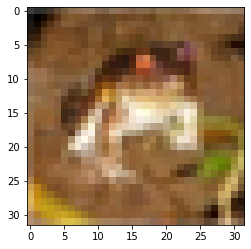

In [2]:
# Example with the CIFAR10 dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Display an image
plt.imshow(train_images[0])
plt.show()


## Visualizing the Data


A picture is worth a thousand numbers! Let's visualize some images from the CIFAR10 dataset.



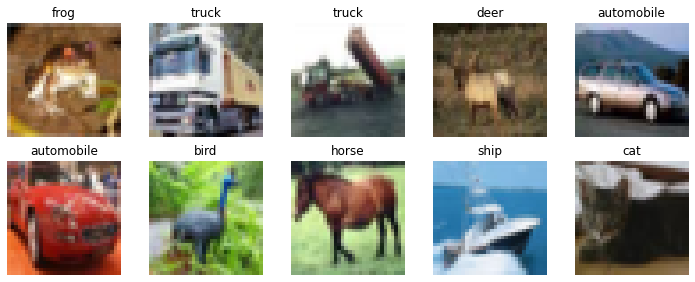

In [3]:
# Visualizing a few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(train_images[i])
    ax.set_title(class_names[train_labels[i][0]])
    ax.axis('off')
plt.tight_layout()


Here, we see a diverse set of images representing 10 different classes. Each image has its unique attributes and nuances, challenging our models to generalize across varied instances.



## Data Distribution


It's essential to understand the distribution of our classes. Are they balanced? Let's find out.

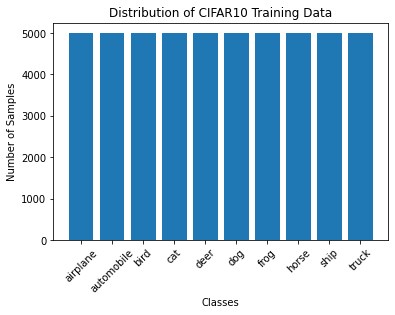

In [4]:
# Visualizing data distribution
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=class_names)
plt.title("Distribution of CIFAR10 Training Data")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


A balanced dataset ensures our model doesn't become biased towards any specific class. As seen, CIFAR10 is fairly balanced across its classes, making it an ideal starting point for various modeling tasks.

### Pixel Value Distribution


Understanding pixel value distribution can be crucial for certain preprocessing steps, like normalization. Let's see the spread.

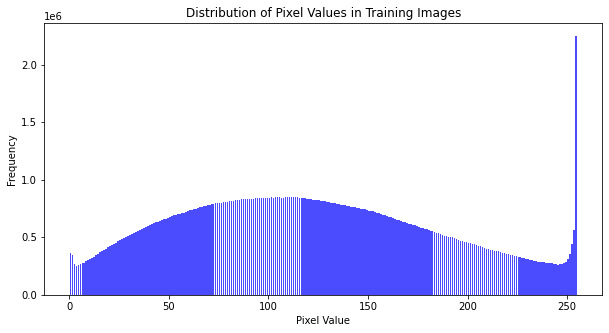

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(train_images.ravel(), bins=255, color='blue', alpha=0.7, rwidth=0.8)
plt.title("Distribution of Pixel Values in Training Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Most image-related models prefer data where pixel values lie between 0 and 1. Observing the distribution helps us decide the best normalization approach.

## Data Cleaning

Not all data is clean. There could be missing values, outliers, or even corrupt images. While our dataset today is quite polished, it's essential to know how to handle imperfections in the wild.

In [6]:
# Remove an 'example' corrupt image (this is illustrative)
train_images = [img for i, img in enumerate(train_images) if i != 'corrupt_index']

# It's also crucial to ensure labels correspond after cleaning
train_labels = [label for i, label in enumerate(train_labels) if i != 'corrupt_index']


## Image Normalization

Neural networks love normalized data. It makes the optimization landscape smoother, leading to faster convergence. By scaling our image pixel values to be between 0 and 1, we ensure our network has a good starting point.

In [7]:
import numpy as np

# Convert the lists to NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)

# Normalize the pixel values
train_images_normalized = train_images_array.astype('float32') / 255.0
test_images_normalized = test_images_array.astype('float32') / 255.0


## Data Splitting



Training a model on all your data and then testing it on that same data is like practicing for an exam with the exact questions that'll appear. We'll split our data into a training set and a validation set.

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(train_images_normalized, train_labels,
                                                  test_size=0.2, random_state=42)


## Conclusion

Data preparation is a silent hero in the deep learning workflow. A well-prepared dataset not only ensures the reliability of our models but can also speed up training. With these foundations, you're now equipped to feed your TensorFlow models the nourishment they crave!

>#### <font color=#800080>Task 6:</font> <a class="anchor" id="Task-1"></a>


## African Fashion Trend Analysis


The fashion industry in Africa has been rapidly evolving, with various styles and fabrics becoming popular. As a fashion analyst for a startup in Lagos, Nigeria, you have been given the task to understand and predict upcoming trends. This will help designers across the continent produce more appealing designs for the international and local market.

Using the `FASHIONMNIST` dataset In TensorFlow, which contains a plethora of fashion items, your job is to prepare this data for a machine learning model that can recognize and categorize these items. This data will be used to predict fashion trends and to offer insights into popular design structures.


Instructions:

1. Loading the Dataset: Use TensorFlow to load the FASHIONMNIST dataset.

2. Visualization: Visualize some samples from each category in the dataset to get a sense of the data you are dealing with.
3. Cleaning the Data: Check for any missing or corrupted images and handle them appropriately.

4. Preparing the Data: Normalize the images so their pixel values fall between 0 and 1. Then split the dataset into training, validation, and test sets.

5. Report your findings.

>#### <font color=#800080>Task 7:</font> <a class="anchor" id="Task-1"></a>


## Handwriting Assistance for the Blind


In many parts of Africa, resources for the blind are limited, making education and communication a challenge. A non-profit organization in Nairobi, Kenya, is aiming to create a tool that can transcribe handwritten text into audible feedback.


Using the `MNIST` dataset, which consists of hand-written digits, your job is to prepare this data to train a machine learning model that can recognize these digits. This will be the first step in creating a broader tool that can recognize and vocalize handwritten texts for the visually impaired in Africa.

Instructions:

1. Loading the Dataset: Use TensorFlow to load the MNIST dataset.

2. Visualization: Visualize some samples from the dataset to understand the varieties of handwriting you are dealing with.

3. Cleaning the Data: Ensure there are no missing values, and handle any anomalies or corrupted images you find.

4. Preparing the Data: Normalize the images to ensure pixel values are between 0 and 1. Subsequently, split your dataset into training, validation, and test sets.


## References: 

* https://www.tensorflow.org/tutorials/load_data/images
* https://keras.io/api/datasets/